# Análisis de Componentes Principales (PCA)

En este bloque se aplicará un Análisis de Componentes Principales (PCA) a las principales variables clínicas y metabólicas de la cohorte 
(SLEDAI, IMC, triglicéridos, proteína C reactiva y vitamina D).  

El objetivo es reducir la dimensionalidad del dataset y explorar posibles patrones de agrupamiento entre pacientes de diferentes países, 
así como identificar qué variables contribuyen más a la variabilidad observada.


# PC1 vs PC2

In [2]:
# --- Librerías necesarias ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Rutas ---
DATA_PATH = "outputs/dataset_ready.csv"

# --- Cargar dataset ---
df = pd.read_csv(DATA_PATH)

# --- Vista rápida ---
df.head()


,Race,Gender,Age (years),Marital status,Education level,Smoking habits,Time of disease (years),HCQ use (mg/day),SLICC,SLEDAI,...,Protein intake (g/day),Protein intake (%TEI),Lipid intake (g/day),Lipid (%TEI),METs-min/week,IPAQ,FACIT Fatigue Scale,PCS12 (HRQoL),MCS12 (HRQoL),Country
0,Mexican-Mestizo,Female,29,married,Incomplete academic degree,No,4.0,NaN,0.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
1,Mexican-Mestizo,Female,24,married,Incomplete academic degree,No,4.0,NaN,0.0,0.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
2,Mexican-Mestizo,Female,66,widow,Incomplete academic degree,No,16.0,NaN,4.0,0.0,...,41.390,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
3,Mexican-Mestizo,Female,29,single,Incomplete academic degree,yes,1.0,NaN,1.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Activo,NaN,NaN,NaN,Mexico
4,Mexican-Mestizo,Female,40,single,Incomplete academic degree,No,13.0,NaN,1.0,0.0,...,87.005,NaN,52.70,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico


In [3]:
# --- Selección de variables para PCA ---
# Ajusta nombres según columnas exactas de tu dataset
vars_pca = ["SLEDAI", "BMI (kg/m2)", "Triglycerides (mg/dL)", 
            "C-reactive protein", "Vitamin D (ng/mL)"]

# Crear dataframe solo con esas variables
data_pca = df[vars_pca].copy()

# Eliminar filas con valores nulos en estas variables
data_pca = data_pca.dropna()

# Guardar también los países para colorear después
countries = df.loc[data_pca.index, "Country"]

# Vista rápida
data_pca.head()


,SLEDAI,BMI (kg/m2),Triglycerides (mg/dL),C-reactive protein,Vitamin D (ng/mL)
0,4.0,36.900,306.00,8.51,26.91
1,0.0,30.175,106.68,15.92,14.16
2,0.0,30.175,119.04,3.59,27.27
3,4.0,27.000,137.16,3.02,33.27
4,0.0,30.175,66.00,3.19,25.13


In [4]:
# --- Escalado de variables ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_pca)

# Comprobar dimensiones
print("Tamaño de la matriz escalada:", X_scaled.shape)


Tamaño de la matriz escalada: (213, 5)


In [5]:
# --- PCA ---
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
explained_var = pca.explained_variance_ratio_

# Mostrar resultados
for i, var in enumerate(explained_var, start=1):
    print(f"Componente {i}: {var:.2%} de la varianza explicada")

# Varianza acumulada
print("\nVarianza acumulada:", explained_var.cumsum())


Componente 1: 23.27% de la varianza explicada
Componente 2: 21.99% de la varianza explicada
Componente 3: 19.69% de la varianza explicada
Componente 4: 18.90% de la varianza explicada
Componente 5: 16.15% de la varianza explicada

Varianza acumulada: [0.23273381 0.45266145 0.64953388 0.83848735 1.        ]


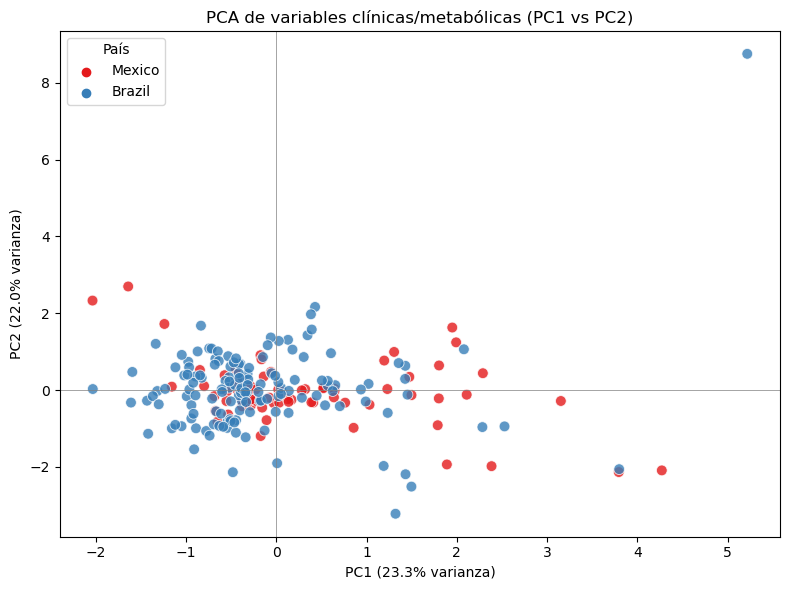

Guardado en: TFM MÁSTER BIOINFORMÁTICA/outputs/figuras/pca_pc1_pc2.png


<Figure size 640x480 with 0 Axes>

In [6]:
# --- Crear DataFrame con PCs y países ---
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, 6)])
df_pca["Country"] = countries.values

# --- Gráfico PCA (PC1 vs PC2) ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Country", palette="Set1", s=60, alpha=0.8)

plt.title("PCA de variables clínicas/metabólicas (PC1 vs PC2)")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% varianza)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% varianza)")
plt.legend(title="País")
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.tight_layout()

plt.show()


# Guardar la figura en outputs/figuras
import os
os.makedirs("TFM MÁSTER BIOINFORMÁTICA/outputs/figuras", exist_ok=True)

out_path = "TFM MÁSTER BIOINFORMÁTICA/outputs/figuras/pca_pc1_pc2.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
print("Guardado en:", out_path)

plt.show()


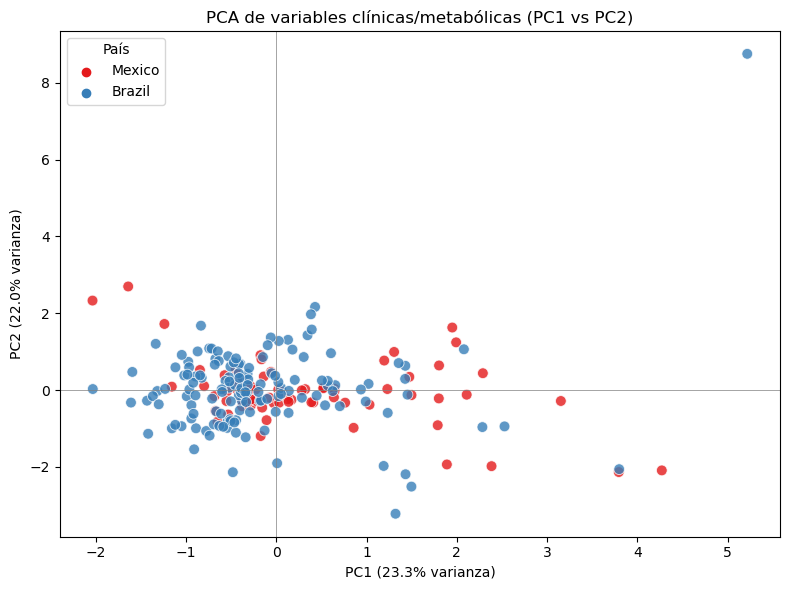

In [7]:
# --- Crear DataFrame con PCs y países ---
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, 6)])
df_pca["Country"] = countries.values

# --- Gráfico PCA (PC1 vs PC2) ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Country", palette="Set1", s=60, alpha=0.8)

plt.title("PCA de variables clínicas/metabólicas (PC1 vs PC2)")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% varianza)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% varianza)")
plt.legend(title="País")
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.tight_layout()

# --- Guardar ---
plt.savefig("outputs/figuras/pca_pc1_pc2.png", dpi=300, bbox_inches="tight")

plt.show()


# PC1 vs PC3

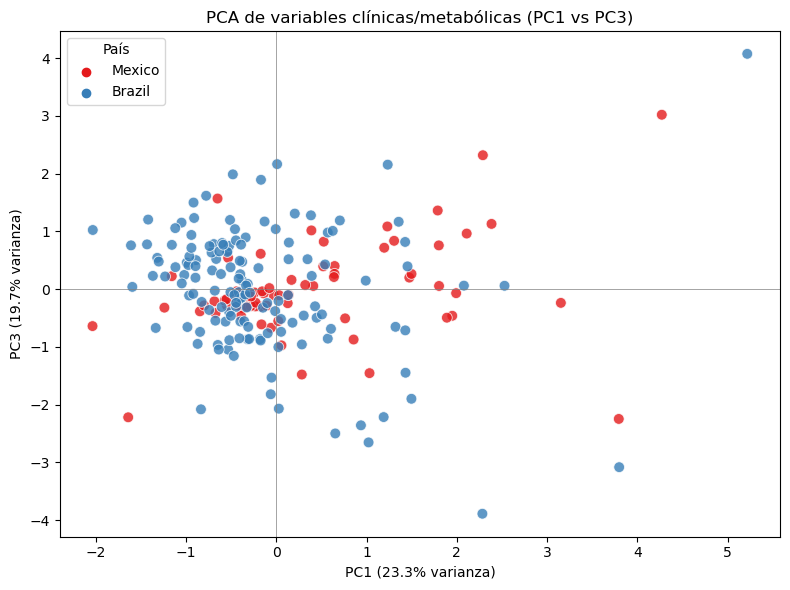

In [8]:
# --- Gráfico PCA (PC1 vs PC3) ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC3",
    hue="Country",
    palette="Set1",
    s=60,
    alpha=0.8
)

plt.title("PCA de variables clínicas/metabólicas (PC1 vs PC3)")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% varianza)")
plt.ylabel(f"PC3 ({explained_var[2]*100:.1f}% varianza)")
plt.legend(title="País")
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.tight_layout()

# --- Guardar figura ---
import os
os.makedirs("outputs/figuras", exist_ok=True)
plt.savefig("outputs/figuras/pca_pc1_pc3.png", dpi=300, bbox_inches="tight")

plt.show()
